In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Define constants
T=1
M=100
N=1000

#a func, a+ and a-
def simple_a(x, t=0):
    return np.array((x-1/3)*(x-2/3))

def dx_simple_a(x, t=0):
    return np.array(2*x-1)

def simple_a2(x, t=0):
    return np.array((x-1/4)*(x-3/4))

def simple_a3(x, t=0):
    return simple_a(x**2, t)

#Matrix creator
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

#Plot func
def plot_solutionTest(U1, U2=np.zeros((1,1)), U3=np.zeros((1,1)), angle=-30, filename="pdfName", name="Analytic function"):
    x_len = len(U1[:, ])
    t_len = len(U1[0])
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
    fig.suptitle(name, fontsize=14)
    tt, xx = np.meshgrid(t, x)
    ax[0].plot_surface(tt, xx, U1, cmap=cm.coolwarm)
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x')
    ax[0].set_zlabel('u')
    ax[0].set_title(r'Numerical solution')
    ax[0].view_init(azim=angle)        # Rotate the figure
    if np.shape(U2)==np.shape(U1):
        ax[1].plot_surface(tt, xx, U2, cmap=cm.coolwarm)
        ax[1].set_xlabel('t')
        ax[1].set_ylabel('x')
        ax[1].set_zlabel('u')
        ax[1].set_title(r'Exact solution')
        ax[1].view_init(azim=angle)
    if np.shape(U3)==np.shape(U1):
        ax[2].plot_surface(tt, xx, U3, cmap=cm.coolwarm)
        ax[2].set_xlabel('t')
        ax[2].set_ylabel('x')
        ax[2].set_zlabel('u')
        ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
        ax[2].view_init(azim=angle)              
    fig.savefig(filename)
    fig.tight_layout()

In [3]:
def LAX_Wendroff(M, T, N, init, bc, a, RHS, dx_a, RHS_d):
    
    h=1/M
    k=T/N
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))
    U[:, 0] = init(x)
    
    r = k/h*(a(x))
    
    lower=1/2*(r**2 + r)[1:] - (k*r*dx_a(x)/4)[1:]
    middle=np.ones(len(x))-r**2
    upper=1/2*(r**2-r)[:-1] + (k*r*dx_a(x)/4)[1:]
    
    A=tridiag(lower, middle, upper)
    
    F = k*RHS(t,x,a) + k**2/2*(RHS_d(t, x, a))
    
    for n in range(N):
        U[:, n+1]=A@U[:, n] + F[:,n]
        #U[M, n+1] = U[M-1,n+1]
        U[M, n+1] = 2*U[M-1,n+1] - U[M-2,n+1]
        U[0,n+1] = bc(t[n+1], init, a)
    
    return U


In [4]:
T=1
M=100
N=1000

xxx=np.linspace(0, 1, M+1)
ttt=np.linspace(0, T, N+1)


def withRHS1(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return -2*tt*np.cos(2*np.pi*xx)*np.exp(-tt**2) - a(xx)*2*np.pi*np.sin(2*np.pi*xx)*np.exp(-tt**2)

def RHS1_d(t,x,a):
    tt, xx=np.meshgrid(t, x)
    return 2*np.exp(-tt**2)*(np.cos(2*np.pi*xx)*(2*tt**2 - 1) - 2*np.pi*tt*np.sin(2*np.pi*xx)) - 4*np.pi*a(xx)*np.exp(-tt**2)*(tt*np.sin(2*np.pi*xx)-np.pi*np.cos(2*np.pi*xx))

def u_exact1(f, x, a, t):
    return np.cos(2*np.pi*x)*np.exp(-t**2)

def init_RHS1(x):
    return u_exact1(0, x, 0, 0)

def bc_RHS1(t, init, a):
    return u_exact1(0, 0, 0, t)


#############################


def withRHS2(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return -np.sin(2*np.pi*xx)*np.exp(-tt) + a(xx)*2*np.pi*np.cos(2*np.pi*xx)*np.exp(-tt)

def RHS2_d(t,x,a):
    tt, xx=np.meshgrid(t, x)
    return np.exp(-tt)*np.sin(2*np.pi*xx)*(1+a(xx)**2*(2*np.pi)**2)
    #return 2*np.pi*np.exp(-tt)*((np.cos(2*np.pi*xx))*(2*np.pi*a(xx)-a(xx) - 1) + a(xx)**2*2*np.pi*np.sin(2*np.pi*xx))

def u_exact2(f, x, a, t):
    return np.sin(2*np.pi*x)*np.exp(-t)

def init_RHS2(x):
    return u_exact2(0, x, 0, 0)

def bc_RHS2(t, init, a):
    return u_exact2(0, 0, 0, t)

######################

    
def withRHS3(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return 2*np.pi*np.cos(2*np.pi*xx)*np.cos(2*np.pi*tt) - a(xx)*2*np.pi*np.sin(2*np.pi*xx)*np.sin(2*np.pi*tt)

def RHS3_d(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return (2*np.pi)**2*(2*a(xx)*np.sin(2*np.pi*xx)*np.cos(2*np.pi*tt) - np.cos(2*np.pi*xx)*np.sin(2*np.pi*tt)*(1+a(xx)**2))

def u_exact3(f, x, a, t):
    return np.cos(2*np.pi*x)*np.sin(2*np.pi*t)

def init_RHS3(x):
    return u_exact3(0, x, 0, 0)

def bc_RHS3(t, init, a):
    return u_exact3(0, 0, 0, t)


########################


def withRHS4(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return - np.exp(-xx)*np.exp(-tt) - a(xx)*np.exp(-xx)*np.exp(-tt)

def RHS4_d(t, x, a):
    tt, xx=np.meshgrid(t, x)
    return np.exp(-xx)*np.exp(-tt)*(2+a(xx) + a(xx)**2)

def u_exact4(f, x, a, t):
    return np.exp(-x)*np.exp(-t)

def init_RHS4(x):
    return u_exact4(0, x, 0, 0)

def bc_RHS4(t, init, a):
    return u_exact4(0, 0, 0, t)



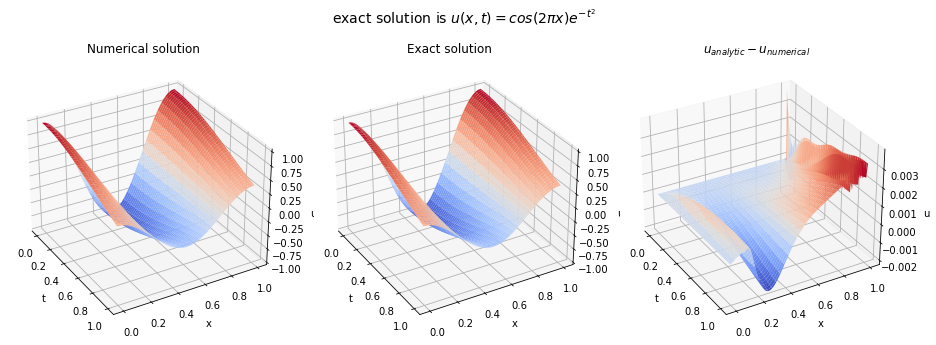

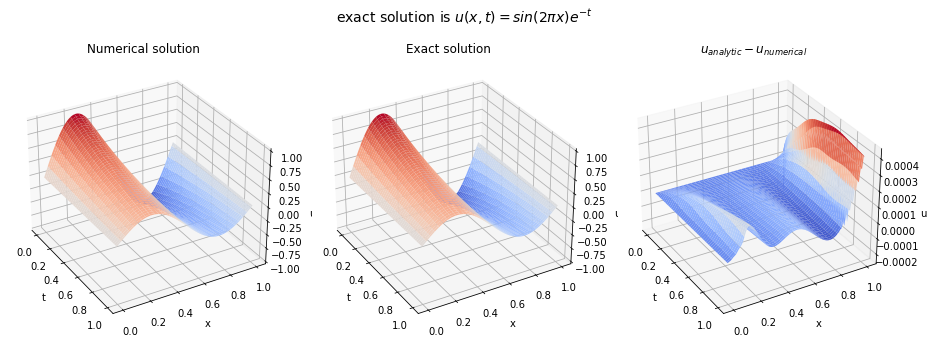

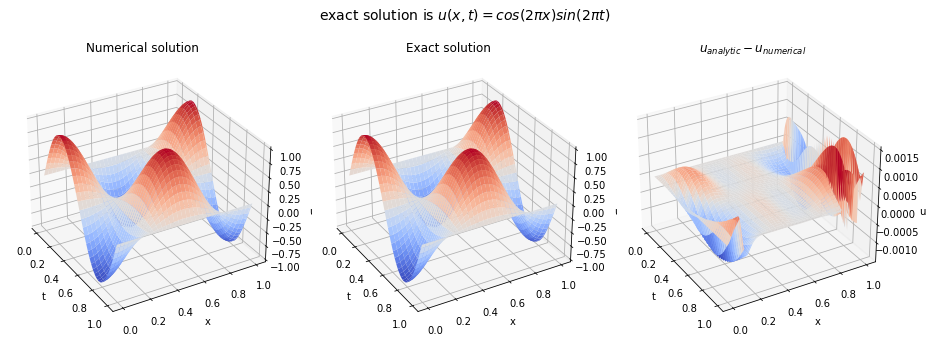

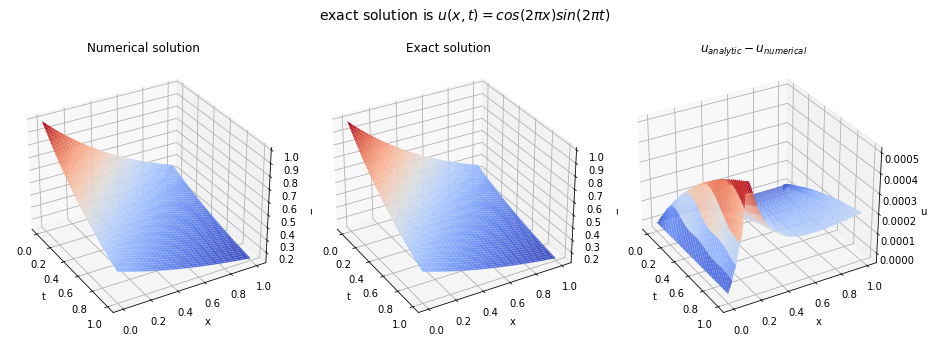

In [5]:
tttt, xxxx=np.meshgrid(ttt, xxx)

test1= LAX_Wendroff(M, T, N, init_RHS1, bc_RHS1, simple_a, withRHS1, dx_simple_a, RHS1_d)

exact1 = u_exact1(0,xxxx, simple_a, tttt)

diff1 = test1-exact1

plot_solutionTest(test1, exact1, diff1, angle=-30, filename="numeric LAX_Wendroff vs exact test 1", name=r'exact solution is $u(x,t)=cos(2\pi x)e^{-t^2}$')

#############

test2= LAX_Wendroff(M, T, N, init_RHS2, bc_RHS2, simple_a, withRHS2, dx_simple_a, RHS2_d)

exact2 = u_exact2(0,xxxx, simple_a, tttt)

diff2 = test2-exact2

plot_solutionTest(test2, exact2, diff2, angle=-30, filename="numeric LAX_Wendroff vs exact test 2", name=r'exact solution is $u(x,t)=sin(2\pi x)e^{-t}$')


#############

test3= LAX_Wendroff(M, T, N, init_RHS3, bc_RHS3, simple_a, withRHS3, dx_simple_a, RHS3_d)

exact3 = u_exact3(0,xxxx, simple_a, tttt)

diff3 = test3-exact3

plot_solutionTest(test3, exact3, diff3, angle=-30, filename="numeric LAX_Wendroff vs exact test 3", name=r'exact solution is $u(x,t)=cos(2\pi x)sin(2\pi t)$')

###########

test4= LAX_Wendroff(M, T, N, init_RHS4, bc_RHS4, simple_a, withRHS4, dx_simple_a, RHS4_d)

exact4 = u_exact4(0,xxxx, simple_a, tttt)

diff4 = test4-exact4

plot_solutionTest(test4, exact4, diff4, angle=-30, filename="numeric LAX_Wendroff vs exact test 3", name=r'exact solution is $u(x,t)=cos(2\pi x)sin(2\pi t)$')






In [22]:
def error_func_h(scheme, init, bc, a, u_exact_method, RHS, RHS_d, dx_a):
    Ms=np.arange(10,30,1)
    hs=1/Ms
    t=np.linspace(0, T, N+1)
    error = np.zeros(len(hs))
    for i in range(len(Ms)):
        u_numeric = scheme(Ms[i], T, N, init, bc, a, RHS, dx_a, RHS_d)
        x = np.linspace(0, 1, Ms[i]+1)
        tt, xx = np.meshgrid(t,x)
        u_exact = u_exact_method(0, xx, a, tt)
        error[i] = np.max( np.abs(u_numeric[-1,:] - u_exact[-1,:]))
    order = np.polyfit(np.log(hs),np.log(error),1)[0]
    return hs, error , order


def error_func_k(solver, init, bc, a, u_ref, RHS, RHS_d, dx_a):
    Ms=50
    Ns=np.arange(8, 30, 1)
    ks=1/Ns
    error=np.zeros(len(ks))
    for i in range(len(Ns)):
        u_numeric= solver(Ms, T, Ns[i], init, bc, a, RHS, dx_a, RHS_d)
        error[i] = np.max(np.abs(u_numeric[:, -1] - u_ref[:, -1]))
    order=np.polyfit(np.log(ks), np.log(error), 1)[0]
    return ks, error, order

def convergence_plot(arr1, arr2, arr3, ref, c=1.5, scheme="Scheme", time_or_space=r'$C$'):
    fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
    fig.suptitle(scheme, fontsize=15)
    ax1.loglog(ref, arr1, 'o-', linestyle='-', color="lime", label="Test 1")
    ax1.loglog(ref, arr2, 'o-', linestyle='-', color="magenta", label="Test 2")
    ax1.loglog(ref, arr3, 'o-', linestyle='-', color="cyan", label="Test 3")
    ax1.loglog(ref, c*ref, color="orange", label=time_or_space)
    ax1.legend()
    ax1.legend(prop={'size': 13})
    ax1.set_title(r'Log-Log plot of errors with RHS')
    fig.savefig("Error plots Upwind")
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)





In [29]:

T=1
M=100
N=10000


hs_RHS1_LAX, error_h_RHS1_LAX, order_h_RHS1_LAX = error_func_h(LAX_Wendroff, init_RHS1, bc_RHS1, simple_a, u_exact1, withRHS1, RHS1_d, dx_simple_a)
hs_RHS2_LAX, error_h_RHS2_LAX, order_h_RHS2_LAX = error_func_h(LAX_Wendroff, init_RHS2, bc_RHS2, simple_a, u_exact2, withRHS2, RHS2_d, dx_simple_a)
hs_RHS3_LAX, error_h_RHS3_LAX, order_h_RHS3_LAX = error_func_h(LAX_Wendroff, init_RHS3, bc_RHS3, simple_a, u_exact3, withRHS3, RHS3_d,dx_simple_a)
#hs_RHS4_LAX, error_h_RHS4_LAX, order_h_RHS4_LAX = error_func_h(LAX_Wendroff, init_RHS3, bc_RHS4, simple_a, u_exact4, withRHS4, RHS4_d,dx_simple_a)


Uref_k_RHS1 = LAX_Wendroff(50, T, 100000, init_RHS1, bc_RHS1, simple_a, withRHS1, dx_simple_a, RHS1_d)
Uref_k_RHS2 = LAX_Wendroff(50, T, 100000, init_RHS2, bc_RHS2, simple_a, withRHS2, dx_simple_a, RHS2_d)
Uref_k_RHS3 = LAX_Wendroff(50, T, 100000, init_RHS3, bc_RHS3, simple_a, withRHS3, dx_simple_a, RHS3_d)

ks_RHS1_LAX, error_k_RHS1_LAX, order_k_RHS1_LAX = error_func_k(LAX_Wendroff, init_RHS1, bc_RHS1, simple_a, Uref_k_RHS1, withRHS1, RHS1_d, dx_simple_a)
ks_RHS2_LAX, error_k_RHS2_LAX, order_k_RHS2_LAX = error_func_k(LAX_Wendroff, init_RHS2, bc_RHS2, simple_a, Uref_k_RHS2, withRHS2, RHS2_d, dx_simple_a)
ks_RHS3_LAX, error_k_RHS3_LAX, order_k_RHS3_LAX = error_func_k(LAX_Wendroff, init_RHS3, bc_RHS3, simple_a, Uref_k_RHS3, withRHS3, RHS3_d,dx_simple_a)



Order: 1.819112271635432
Order: 2.9261612673825628
Order: 2.317008934931451
---------------------------
Order: 1.0043284373417283
Order: 0.9631819733267035
Order: 1.4730598333674392


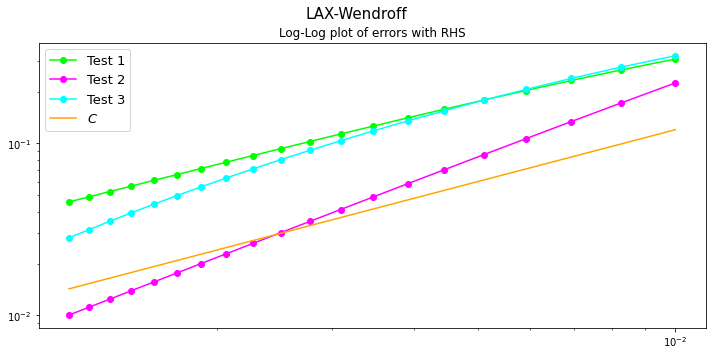

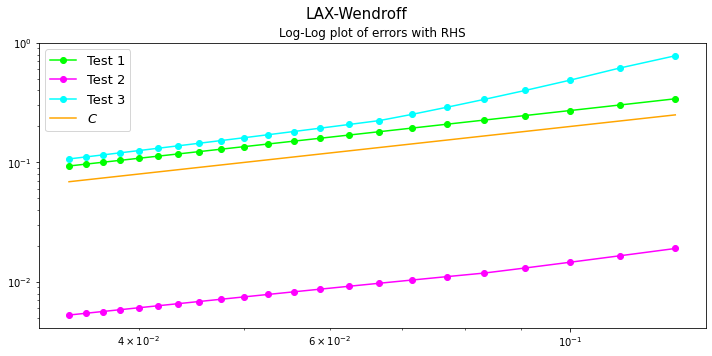

In [30]:
print("Order: " + str(order_h_RHS1_LAX))
print("Order: " + str(order_h_RHS2_LAX))
print("Order: " + str(order_h_RHS3_LAX))

print("---------------------------")

print("Order: " + str(order_k_RHS1_LAX))
print("Order: " + str(order_k_RHS2_LAX))
print("Order: " + str(order_k_RHS3_LAX))

'''
plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=2$', fontsize=20)
plt.loglog(hs_RHS1_LAX, error_h_RHS1_LAX,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(hs_RHS3_LAX, error_h_RHS3_LAX,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(hs_RHS1_LAX, 32*hs_RHS1_LAX**2, label=r'$Ch^2$')
plt.legend(fontsize=15)
plt.show()


plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=2$', fontsize=20)
plt.loglog(ks_RHS1_LAX, error_k_RHS1_LAX,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(ks_RHS2_LAX, error_k_RHS2_LAX,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(ks_RHS3_LAX, error_k_RHS3_LAX,'o-', linestyle='-', color="lime", label="LAX-Wendroff")
plt.loglog(ks_RHS1_LAX, 32*ks_RHS1_LAX**2, label=r'$Ch^2$')
plt.legend(fontsize=15)
plt.show()
'''





convergence_plot(error_h_RHS1_LAX, error_h_RHS2_LAX, error_h_RHS3_LAX, hs_RHS1_LAX**2, c=12, scheme="LAX-Wendroff", time_or_space=r'$C$')

convergence_plot(error_k_RHS1_LAX, error_k_RHS2_LAX, 4*error_k_RHS3_LAX, ks_RHS1_LAX, c=2, scheme="LAX-Wendroff", time_or_space=r'$C$')


